In [17]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

In [18]:
import json
def load_case(path):
    with open(path, 'r+') as file: return json.load(file)

json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-hT')], 
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('alg1-hT')],
                         reverse = True)
import datetime
date_string = datetime.date.today().strftime("%Y-%m-%d")

for file_name_mc, file_name_alg1 in zip(json_files_mc, json_files_alg1):
    date = file_name_mc[6:len(file_name_mc) - 5] #the date is the same for the two for how run.py is constructed
    if date_string == date:
        #take the current simulation
        file_to_load_mc = file_name_mc
        file_to_load_alg1 = file_name_alg1
    else:
        #take the last simulation
        file_to_load_mc = json_files_mc[0] 
        file_to_load_alg1 = json_files_alg1[0]
        
mc = load_case(file_to_load_mc)
alg1 = load_case(file_to_load_alg1)

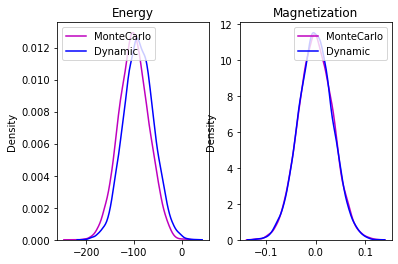

In [12]:
import ising
from ising import *
import matplotlib.pyplot as plt
import seaborn as sns

fig_kde, axes = plt.subplots(1, 2)
h1 = sns.kdeplot(data=mc["energy_sample"], bw_method='scott', color='m', ax=axes[0])
h1.set(xlabel=None)
h2 = sns.kdeplot(data=alg1["energy_sample"], bw_method='scott', color='b', ax=axes[0])
h2.set(xlabel=None)
m1 = sns.kdeplot(data=mc["magnetization_sample"], bw_method='scott', color='m', ax=axes[1])
m1.set(xlabel=None)
m2 = sns.kdeplot(data=alg1["magnetization_sample"], bw_method='scott', color='b', ax=axes[1])
m2.set(xlabel=None)

axes[0].set_title("Energy")
axes[0].legend(['MonteCarlo', 'Dynamic'], loc="upper left")
axes[1].set_title("Magnetization")
axes[1].legend(['MonteCarlo', 'Dynamic'], loc="upper right")

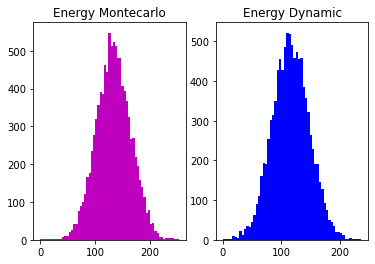

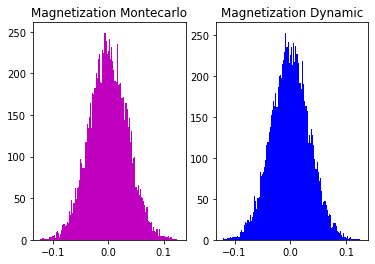

In [13]:
chain = Chain(size=alg1["number of spins"])
bin_edges_engy_mc, metropolis_engy = hist(chain, mc["energy_sample"], engy_flag=True)
bin_edges_engy_dynamic, dynamic_engy = hist(chain, alg1["energy_sample"], engy_flag=True)
fig_engy, axes = plt.subplots(1, 2)
axes[0].hist(metropolis_engy, bins=bin_edges_engy_mc, label='Metropolis', color='m')
axes[1].hist(dynamic_engy, bins=bin_edges_engy_dynamic, label='Dynamic', color='b')
axes[0].set_title("Energy Montecarlo")
axes[1].set_title("Energy Dynamic")
bin_edges_m_mc, metropolis_m = hist(chain, mc["magnetization_sample"], engy_flag=False)
bin_edges_m_dynamic, dynamic_m = hist(chain, alg1["magnetization_sample"], engy_flag=False)
fig_m, axes = plt.subplots(1, 2)
axes[0].hist(metropolis_m, bins=bin_edges_m_mc, label='Metropolis', color='m')
axes[1].hist(dynamic_m, bins=bin_edges_m_dynamic, label='Dynamic', color='b')
axes[0].set_title("Magnetization Montecarlo")
axes[1].set_title("Magnetization Dynamic")
plt.show()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

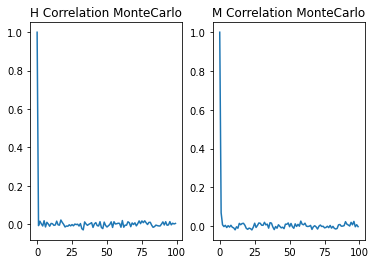

In [14]:
mc_engy_corr = acrl(mc["energy_sample"], len(mc["energy_sample"]))
mc_m_corr = acrl(mc["magnetization_sample"], len(mc["magnetization_sample"]))
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr[:100])
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr[:100])
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

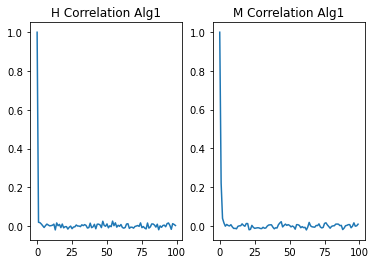

In [19]:
alg1_engy_corr = acrl(alg1["energy_sample"], len(alg1["energy_sample"]))
alg1_m_corr = acrl(alg1["magnetization_sample"], len(alg1["magnetization_sample"]))
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr[:100])
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr[:100])
axes[1].set_title("M Correlation Alg1")

In [20]:
mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

#H0: the two samples came from the same distribution
print(f'pvalue two-sample energy:', two_sample_chi2test(mc_engy_counts, alg1_engy_counts, n_samples_a=len(mc["energy_sample"]), 
                                                        n_samples_b=len(alg1["energy_sample"])))
print(f'pvalue two-sample magnetization:', two_sample_chi2test(mc_m_counts, alg1_m_counts, n_samples_a=len(mc["magnetization_sample"]), 
                                                               n_samples_b=len(alg1["magnetization_sample"])))

pvalue two-sample energy: 1.0
pvalue two-sample magnetization: 0.6620605539691135
